In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [6]:
train = pd.read_csv('SampleSuperstore.csv')

In [8]:
train.shape

(9994, 13)

In [15]:
train.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
train.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [19]:
train.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
train.shape

(9994, 13)

In [21]:
# To Remove the Duplicate Value

train.drop_duplicates(keep='first', inplace=True)

In [22]:
train.shape

(9977, 13)

### Exploratory Data Analysis on Superstore Data

In [7]:
train.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


### Total Sales and Profit

In [8]:
print('Total profit of the SuperStore :', train['Profit'].sum())

Total profit of the SuperStore : 286397.0217


In [10]:
print('Total sales of the SuperStore :', train['Sales'].sum())

Total sales of the SuperStore : 2297200.8603000003


### California has the Highest sales

In [18]:
Sales_5 = train.groupby("State").Sales.sum().sort_values(ascending = False).head(7)

Text(0.5, 1.0, 'State with Highest Sales')

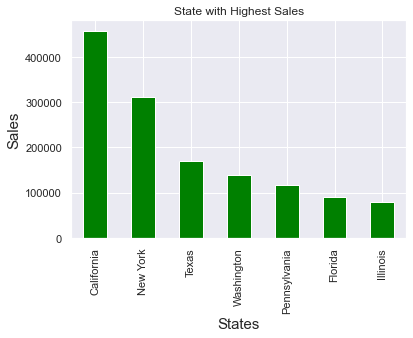

In [19]:
sns.set()
Sales_5.plot(kind = 'bar', color='green')
plt.xlabel('States', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('State with Highest Sales')

### California has the Highest Profit too

In [20]:
Profit_5 = train.groupby("State").Profit.sum().sort_values(ascending = False).head(7)

Text(0.5, 1.0, 'State with Highest Sales')

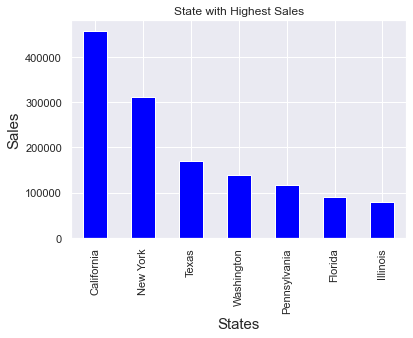

In [21]:
sns.set()
Sales_5.plot(kind = 'bar', color='blue')
plt.xlabel('States', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title('State with Highest Sales')

### California & Newyork has highest sales and profit comparing others, They are much Ahead

In [22]:
train_num = train[['Profit','Sales','Discount','Quantity']]

In [23]:
train_num.shape

(9994, 4)

In [24]:
train_num.corr()

,Profit,Sales,Discount,Quantity
Profit,1.000000,0.479064,-0.219487,0.066253
Sales,0.479064,1.000000,-0.028190,0.200795
Discount,-0.219487,-0.028190,1.000000,0.008623
Quantity,0.066253,0.200795,0.008623,1.000000


<AxesSubplot:>

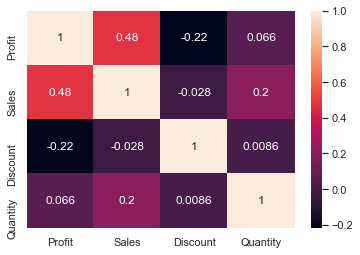

In [25]:
sns.heatmap(train_num.corr(), annot = True)

### Positive correlation between Sales and Profit && Negative correlation between Discount and Profit

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

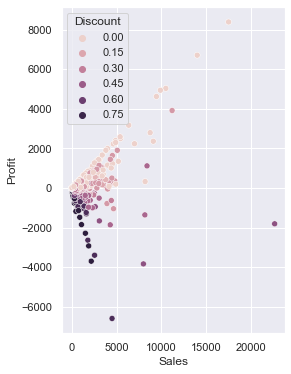

In [26]:
plt.figure(figsize = (4,6))
sns.scatterplot(x='Sales', y = 'Profit', data=train, hue='Discount')

### It is clear from the graph that when the Discount increases, profit goes down

When Discount is 0

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

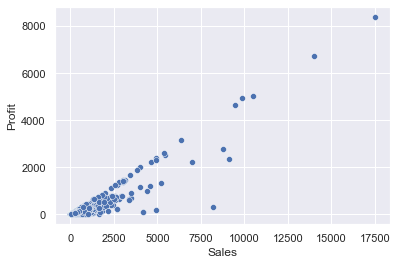

In [27]:
abc = train[train['Discount']==0]
sns.scatterplot(x='Sales',y='Profit',data=abc)

### Positive Relation between Sales and the Profit when Discount is 0

In [28]:
abc.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


<AxesSubplot:>

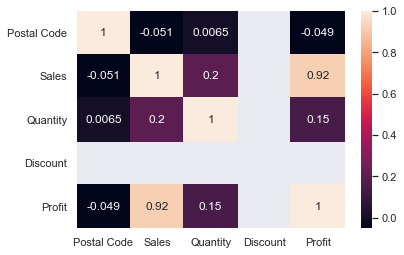

In [29]:
sns.heatmap(abc.corr(), annot=True)

### 0.92 is the Positive Correlation

In [30]:
abc.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.86,7,0.0,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.28,4,0.0,1.9656


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

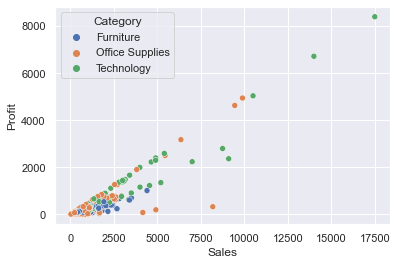

In [31]:
sns.scatterplot(x = 'Sales', y= 'Profit', data = abc, hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

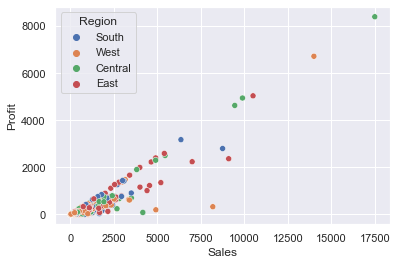

In [32]:
sns.scatterplot(x = 'Sales', y= 'Profit', data = abc, hue = 'Region')

## Regression Plot

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

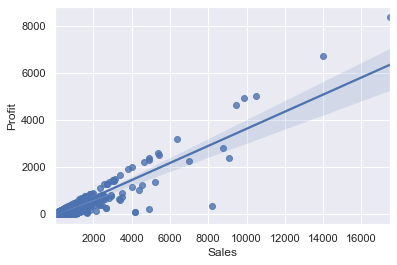

In [33]:
sns.regplot(abc['Sales'],abc['Profit'])


## When Discount is not 0

In [34]:
abc = train[train['Discount']!=0]
abc.shape

(5196, 13)

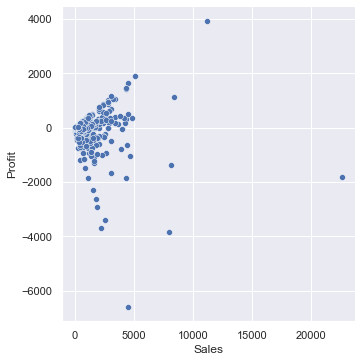

In [35]:
sns.relplot(x= 'Sales', y = 'Profit', data = abc)

### It is clear when Discount is not zero, sales increase and profit Decreases

In [36]:
abc.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
